In [3]:
!pip install tensorflow


  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.70.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using 

   ------------------------------------- -- 362.6/390.3 MB 1.6 MB/s eta 0:00:18
   ------------------------------------- -- 362.6/390.3 MB 1.6 MB/s eta 0:00:18
   ------------------------------------- -- 362.6/390.3 MB 1.6 MB/s eta 0:00:18
   ------------------------------------- -- 362.6/390.3 MB 1.6 MB/s eta 0:00:18
   ------------------------------------- -- 362.6/390.3 MB 1.6 MB/s eta 0:00:18
   ------------------------------------- -- 362.6/390.3 MB 1.6 MB/s eta 0:00:18
   ------------------------------------- -- 362.6/390.3 MB 1.6 MB/s eta 0:00:18
   ------------------------------------- -- 362.6/390.3 MB 1.6 MB/s eta 0:00:18
   ------------------------------------- -- 362.6/390.3 MB 1.6 MB/s eta 0:00:18
   ------------------------------------- -- 362.6/390.3 MB 1.6 MB/s eta 0:00:18
   ------------------------------------- -- 362.8/390.3 MB 1.5 MB/s eta 0:00:19
   ------------------------------------- -- 362.8/390.3 MB 1.5 MB/s eta 0:00:19
   -------------------------------------

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.3997 - loss: 0.6962 - val_accuracy: 0.5250 - val_loss: 0.6758
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4943 - loss: 0.6886 - val_accuracy: 0.5750 - val_loss: 0.6759
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6135 - loss: 0.6779 - val_accuracy: 0.6250 - val_loss: 0.6770
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6274 - loss: 0.6796 - val_accuracy: 0.6000 - val_loss: 0.6773
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6220 - loss: 0.6802 - val_accuracy: 0.6000 - val_loss: 0.6787
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6519 - loss: 0.6748 - val_accuracy: 0.6250 - val_loss: 0.6802
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5962 - loss: 0.6799 - val_accuracy: 0.6500 - val_loss: 0.6812
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5679 - loss: 0.6836 - val_accuracy: 0.6500 - v

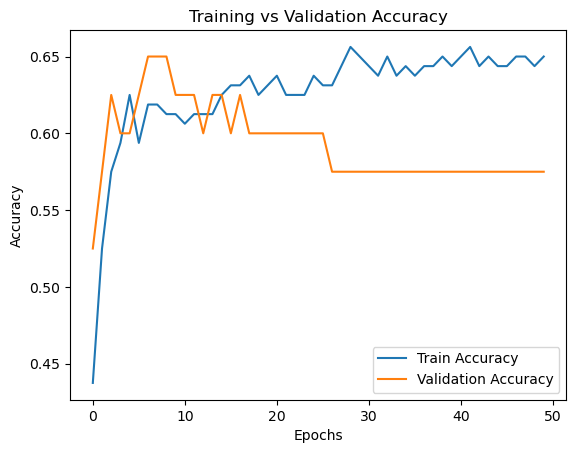

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


file_path = "C:\\Users\\Dharani Ravi\\Downloads\\kmeans\\Mall_Customers.csv"  
df = pd.read_csv(file_path)


print(df.head())

df['Genre'] = LabelEncoder().fit_transform(df['Genre'])  # Male = 1, Female = 0

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Genre'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=1)

y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()
